# Step 1: Import Libraries and Data
*Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).*

In [2]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
plt.style.use('tableau-colorblind10')

In [3]:
# Turn your project folder path into a string

path = r'/Users/peterreadman/Desktop/Python Projects/CareerFoundry/04-2020 Instacart Basket Analysis/'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data', '02b Prepared Data', 'df_ords_prods_cust.pkl'))

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,Order_ID,User_ID,Order_Number,Orders_day_of_the_week,Order_hour_of_day,Days_Since_Prior_Order,Product_ID,Add_To_Cart_Order,Reordered,Unnamed: 0,Product_Name,Aisle_ID,Department_ID,Prices,_merge,Rrice_Range_Loc,Busiest_Day,Busiest_Days,Busiest_Period_of_Day,Max_Order,Loyalty_Flag,Mean_Prices,Spending_Flag,Median_Days,Frequency_Flag,First_Name,Last_Name,Gender,State,Age,Date_Joined,Dependants,Family_Status,Income
0,2539329,1,1,2,8,NaN,196,1,0,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423


# Step 2
*If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.*

## 2a) Bar Charts

Text(0, 0.5, 'Number of Orders (millions)')

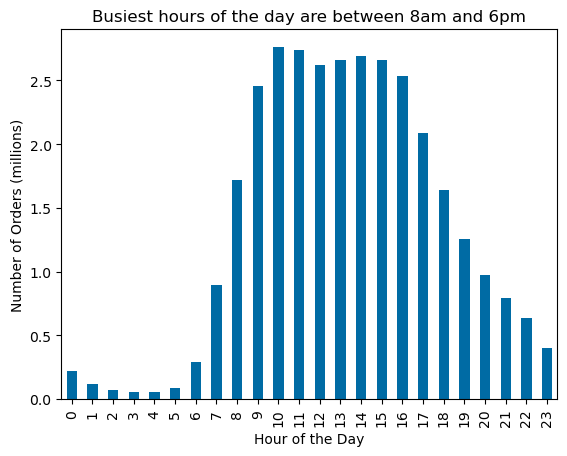

In [7]:
# Create a bar chart - frequency of 'Order_hour_of_day'

from matplotlib.ticker import FuncFormatter

def millions_formatter(x, pos):
    return f'{x / 1000000}'

ax = df['Order_hour_of_day'].value_counts().sort_index().plot(kind='bar', title='Busiest hours of the day are between 8am and 6pm')
# use millions_formatter from FuncFormatter to format Number of Orders as millions
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Orders (millions)')

## 2b) Histograms of Numerical Columns

In [8]:
df.dtypes

Order_ID                           int64
User_ID                            int64
Order_Number                       int64
Orders_day_of_the_week             int64
Order_hour_of_day                  int64
Days_Since_Prior_Order           float64
Product_ID                         int64
Add_To_Cart_Order                  int64
Reordered                          int64
Unnamed: 0                         int64
Product_Name                      object
Aisle_ID                           int64
Department_ID                      int64
Prices                           float64
_merge                          category
Rrice_Range_Loc                   object
Busiest_Day                       object
Busiest_Days                      object
Busiest_Period_of_Day             object
Max_Order                          int64
Loyalty_Flag                      object
Mean_Prices                      float64
Spending_Flag                     object
Median_Days                      float64
Frequency_Flag  

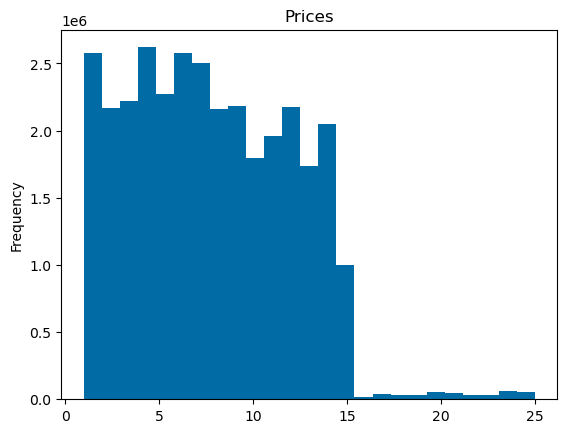

In [9]:
# Distribution of 'Prices'

Prices_hist = df['Prices'].plot(kind='hist', bins = 25, title='Prices')

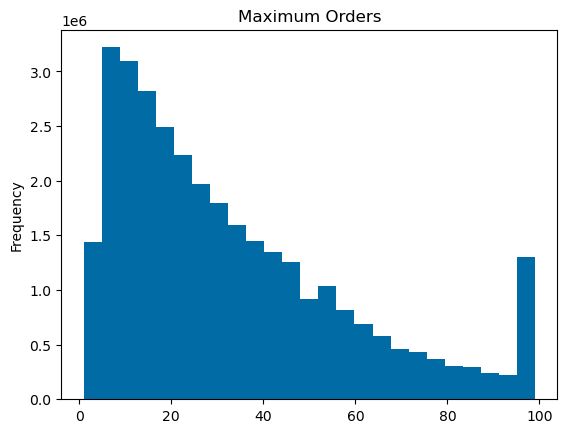

In [10]:
# Distribution of 'Maximum Orders'

Max_Orders_hist = df['Max_Order'].plot(kind='hist', bins = 25, title='Maximum Orders')

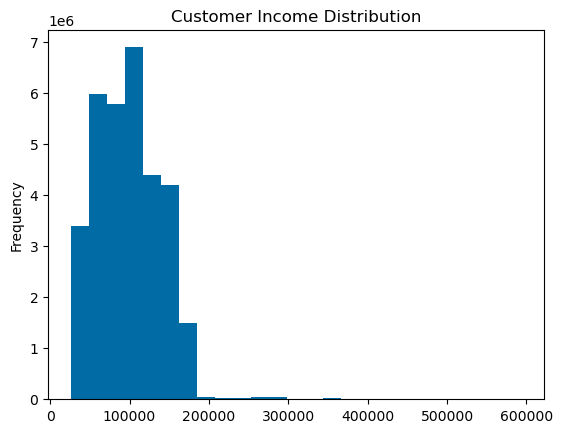

In [11]:
# Distribution of customers' Income

Income_hist = df['Income'].plot(kind='hist', bins = 25, title='Customer Income Distribution')

### Sample the Data and Create a Line Chart

In [12]:
# set the seed.
# This seed represents a random but reproducible pattern,
# ie Python will always return the same set of random numbers
# (in this case, seed '4') Important for other analysts to recreate the same set (sample)

np.random.rand(4)

# Create a list holding True/False values to the test np.random.rand() <= 0.7 (70%)

dev = np.random.rand(len(df)) <= 0.7

In [13]:
# Store 70% of the sample in the dataframe 'big'

big = df[dev]

# Store 30% of the sample in the dataframe 'small'

small = df[~dev]

In [14]:
# Check both 'samples' total 100% 

len(df)

32404859

In [15]:
len(big) + len(small)

32404859

**Eureka! The exact same number of rows!**

In [16]:
# Reduce samples to only columns necessary for the chart

df_2 = small[['Orders_day_of_the_week', 'Prices']]

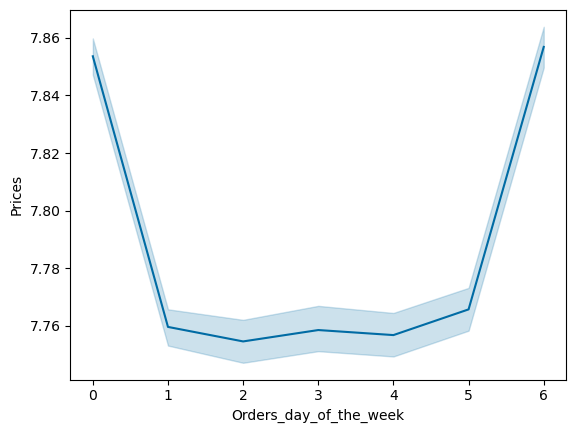

In [17]:
# Create a line chart of 'Orders_day_of_the_week' vs 'Prices'

orders_day_of_week_line = sns.lineplot(
        data = df_2,
        x = 'Orders_day_of_the_week',
        y = 'Prices')

In [18]:
# Create a bar chart for Orders on days of the week

Orders_per_Day_bar = df['Orders_day_of_the_week']


In [19]:
df.columns

Index(['Order_ID', 'User_ID', 'Order_Number', 'Orders_day_of_the_week',
       'Order_hour_of_day', 'Days_Since_Prior_Order', 'Product_ID',
       'Add_To_Cart_Order', 'Reordered', 'Unnamed: 0', 'Product_Name',
       'Aisle_ID', 'Department_ID', 'Prices', '_merge', 'Rrice_Range_Loc',
       'Busiest_Day', 'Busiest_Days', 'Busiest_Period_of_Day', 'Max_Order',
       'Loyalty_Flag', 'Mean_Prices', 'Spending_Flag', 'Median_Days',
       'Frequency_Flag', 'First_Name', 'Last_Name', 'Gender', 'State', 'Age',
       'Date_Joined', 'Dependants', 'Family_Status', 'Income'],
      dtype='object')

# Step 3
You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

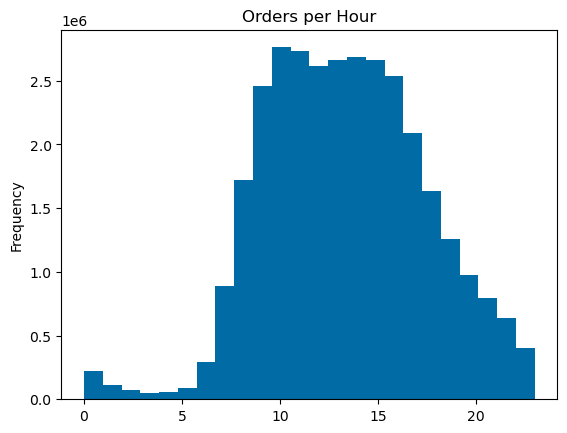

In [20]:
Orders_per_Hour_hist = df['Order_hour_of_day'].plot(kind='hist', bins = 24, title='Orders per Hour')

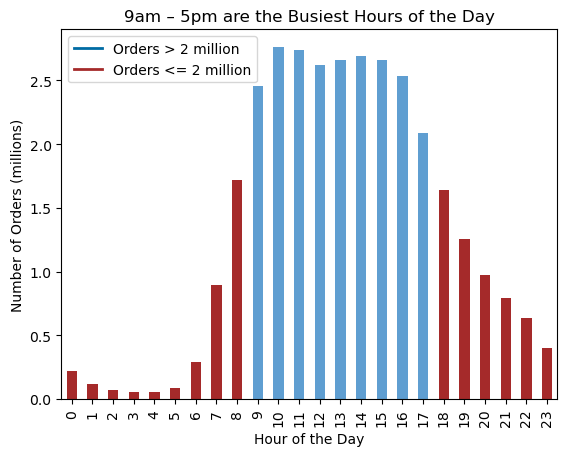

In [21]:
# A bar chart is easier to read and shows essentially the same data

# Create a bar chart - frequency of 'Order_hour_of_day'

from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D

def millions_formatter(x, pos):
    return f'{x / 1000000}'

# Create a bar chart with conditional formatting of colors
fig, Orders_per_Hour_bar = plt.subplots()
df['Order_hour_of_day'].value_counts().sort_index().plot(kind='bar', title='9am – 5pm are the Busiest Hours of the Day',
                                                         ax=Orders_per_Hour_bar, color=[ '#5F9ED1' if freq > 2000000 else 'brown' for freq in df['Order_hour_of_day'].value_counts().sort_index()])

# use millions_formatter from FuncFormatter to format Number of Orders as millions
Orders_per_Hour_bar.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

Orders_per_Hour_bar.set_xlabel('Hour of the Day')
Orders_per_Hour_bar.set_ylabel('Number of Orders (millions)')

# Add a legend
legend_handles = [Line2D([0], [0], color='#006BA4', lw=2, label='Orders > 2 million'),
                  Line2D([0], [0], color='brown', lw=2, label='Orders <= 2 million')]
legend_labels = ['Orders > 2 million', 'Orders <= 2 million']

# Add the custom legend handles and labels
Orders_per_Hour_bar.legend(handles=legend_handles, labels=legend_labels)

plt.show()



*3b. In a markdown cell beneath your histogram, describe what the histogram demonstrates.*

### Observations

- The Majority of orders were placed between 9am – 4pm
- **10am** was the hour with the **maximum number of orders** placed
- The fewest orders were placed between midnight and 6am
- **3am** was the hour with the **minimum number of orders** placed

# Step 4
*The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.*

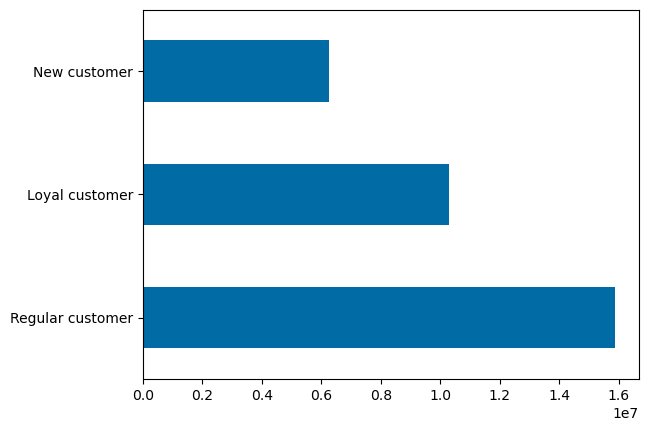

In [22]:
loyalty_bar = df['Loyalty_Flag'].value_counts().plot(kind='barh')

# Step 5

*Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)*

In [23]:
# Use sample as created above: 'Big' and 'Small' samples (70% and 30%)
# Reduce samples to only columns necessary for the chart

df_3 = small[['Order_hour_of_day', 'Prices']]

Text(0, 0.5, 'Prices')

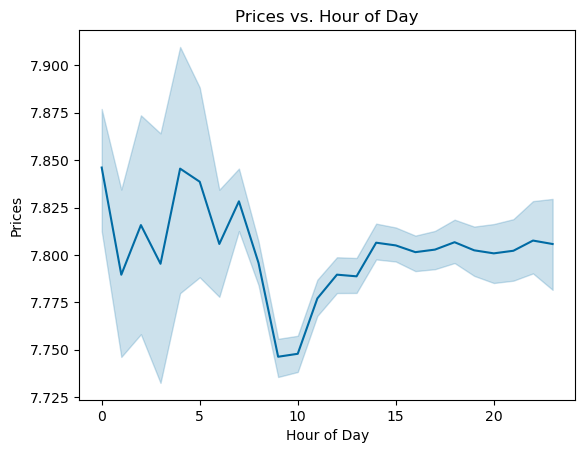

In [24]:
# Create a line chart of 'Order_hour_of_day' vs 'Prices'

prices_vs_hour_line = sns.lineplot(
        data = df_3,
        x = 'Order_hour_of_day',
        y = 'Prices')

# Set title and axis labels
prices_vs_hour_line.set_title("Prices vs. Hour of Day")
prices_vs_hour_line.set_xlabel("Hour of Day")
prices_vs_hour_line.set_ylabel("Prices")



### Observations:
- Products with highest prices tend to be purchased in high volumes in the early hours (2am – 5am)
- Products with the lowest prices tend to be purchased in high volumns between 9am – 11am

# Step 6
*Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:*
- In a markdown cell beneath your line chart, describe what the line chart shows.

In [25]:
# Using the sample (small) create a line chart of Age vs Dependents
# Reduce samples to only columns necessary for the chart

df_4 = small[['Dependants','Age']]

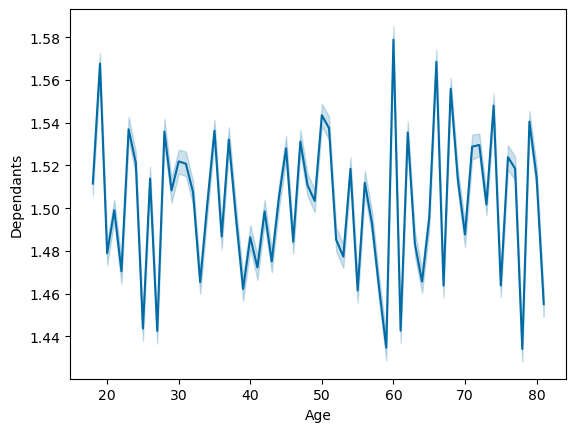

In [26]:
# Create a line chart of 'Dependants' vs 'Age'

age_vs_dependents_line = sns.lineplot(
        data = df_4,
        x = 'Age',
        y = 'Dependants')

### Observations:
- This is not what I expected to see
- This chart is not showing any dependants = 0 or dependents = 3. It's not very helpful to see dependants between 1.42 – 1.58
- So I'm not sure what is happening here

# Step 7
*You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.*
- In a markdown cell beneath your scatterplot, describe what the scatterplot shows.


In [27]:
# Create df_5 of only columns for 'Age' and 'Spending Power'

df_5 = small[['Age','Income']]

In [28]:
# Create a Scatterplot of 'Age' vs 'Income'

age_vs_income_scatterplot sns.scatterplot(x = 'Age', y = 'Income', data = df_5)

SyntaxError: invalid syntax (701333719.py, line 3)

### Observations
- There is a wide range of income across all customers
- the **minimum** income is USD 25,903 
- the **maximum** income is USD 593,901
- There is a range of income within different age ranges as well
- generally, there are more customers with incomes greater than 100,000 in the over 40s 

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
# Return the minimum income value

df_5['Income'].min()

In [ ]:
# Return the maximum income value

df_5['Income'].max()

# Step 8
Export your visualizations as “.png” files in your relevant project folder.

In [ ]:
# Export Orders_per_Hour_hist
Orders_per_Hour_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Orders_per_Hour_hist.png'))

# Export Orders_per_Hour_bar
Orders_per_Hour_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Orders_per_Hour_bar.png'))

# Export loyalty_bar
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_bar.png'))

# Export prices_vs_hour_line
prices_vs_hour_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_vs_hour_line.png'))

# Export age_vs_dependents_line
age_vs_dependents_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_vs_dependents_line.png'))



In [ ]:
# Export orders_day_of_week_line
orders_day_of_week_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_day_of_week_line.png'))

In [ ]:
# Export Prices_hist
Prices_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Prices_hist.png'))

In [ ]:
# Export Max_Orders_hist
Max_Orders_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Max_Orders_hist.png'))